In [29]:
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis as mdist
from scipy.stats import chi2

In [2]:
DATA=ascii.read('iris.data',names=['Sepal Len.','Sepal Width','Petal Len.','Petal Width','Class'])

In [3]:
setosaTrain=DATA[:10]
versTrain=DATA[50:60]
virgTrain=DATA[100:110]

setosaVal=DATA[10:30]
versVal=DATA[60:80]
virgVal=DATA[110:130]

setosaTest=DATA[30:50]
versTest=DATA[80:100]
virgTest=DATA[130:]


In [4]:
def SampleMean(Data,keys=0):
    if keys==0:
        out=np.mean(Data,axis=0)
    else:
        out=np.zeros(len(keys))
        for i in range(len(keys)):
            out[i]=np.mean(Data[keys[i]])
    return out
def Conv2Arr(X):
    X=X.as_array()
    return X.view(float).reshape(X.shape+(-1,))
def Covariance(X):
    SM=SampleMean(X)
    mumut=np.dot(SM.T,SM)#transpose is backwards because they are row vectors not column
    l=len(X)
    out=np.zeros([2,2])
    for i in range(l):
        out+=np.dot(X[i].T,X[i])
    return (out/l)

In [5]:
colors=['red','lime','blue']
names=['Setosa','Versicolor','Virginica']
Train=[setosaTrain,versTrain,virgTrain]
Val=[setosaVal,versVal,virgVal]
Test=[setosaTest,versTest,virgTest]

Text(0, 0.5, 'Petal Width [cm]')

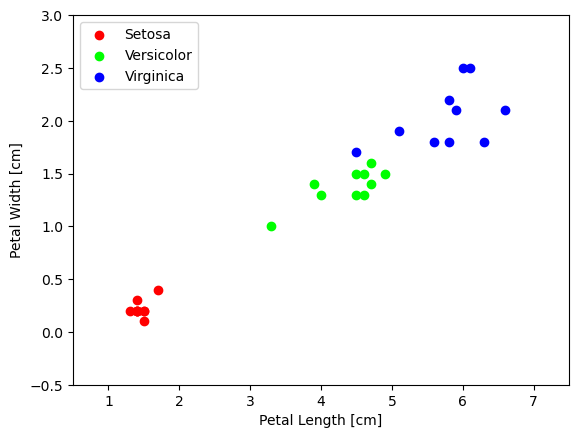

In [6]:
for i in [0,1,2]:
    plt.scatter('Petal Len.','Petal Width',data=Train[i],color=colors[i],label=names[i])
plt.xlim([0.5,7.5])
plt.ylim([-0.5,3.0])
plt.legend()
plt.xlabel('Petal Length [cm]')
plt.ylabel('Petal Width [cm]')

In [15]:
Rx=np.linspace(0.5,7.5,100)
Ry=np.linspace(-0.5,3.0,100)
Rx

array([0.5       , 0.57070707, 0.64141414, 0.71212121, 0.78282828,
       0.85353535, 0.92424242, 0.99494949, 1.06565657, 1.13636364,
       1.20707071, 1.27777778, 1.34848485, 1.41919192, 1.48989899,
       1.56060606, 1.63131313, 1.7020202 , 1.77272727, 1.84343434,
       1.91414141, 1.98484848, 2.05555556, 2.12626263, 2.1969697 ,
       2.26767677, 2.33838384, 2.40909091, 2.47979798, 2.55050505,
       2.62121212, 2.69191919, 2.76262626, 2.83333333, 2.9040404 ,
       2.97474747, 3.04545455, 3.11616162, 3.18686869, 3.25757576,
       3.32828283, 3.3989899 , 3.46969697, 3.54040404, 3.61111111,
       3.68181818, 3.75252525, 3.82323232, 3.89393939, 3.96464646,
       4.03535354, 4.10606061, 4.17676768, 4.24747475, 4.31818182,
       4.38888889, 4.45959596, 4.53030303, 4.6010101 , 4.67171717,
       4.74242424, 4.81313131, 4.88383838, 4.95454545, 5.02525253,
       5.0959596 , 5.16666667, 5.23737374, 5.30808081, 5.37878788,
       5.44949495, 5.52020202, 5.59090909, 5.66161616, 5.73232

In [7]:
X=Conv2Arr(versTrain['Petal Len.','Petal Width'])

In [8]:
Covariance(X)

array([[21.241, 21.241],
       [21.241, 21.241]])

In [25]:
C1=np.linalg.inv(np.cov(X.T))

In [26]:
p=np.zeros([len(Rx),len(Ry)])
for x in range(len(Rx)):
    for y in range(len(Ry)):
        p[x,y]=mdist([Rx[x],Ry[y]],SampleMean(X),C1)
print(p)

[[11.23421613 10.99540748 10.76210982 ... 26.35304818 26.6784828
  27.00430317]
 [11.2659768  11.02209997 10.78349623 ... 26.13209946 26.45785327
  26.78398824]
 [11.30257166 11.05376232 10.80998824 ... 25.91141385 26.23748895
  26.56394047]
 ...
 [26.71340359 26.38154957 26.04993345 ...  9.36483811  9.62534894
   9.89076035]
 [26.92793878 26.59637559 26.26505569 ...  9.32185611  9.57691139
   9.83718002]
 [27.14282805 26.81155539 26.48053133 ...  9.28466917  9.53406486
   9.78899141]]


Text(0, 0.5, 'Petal Width [cm]')

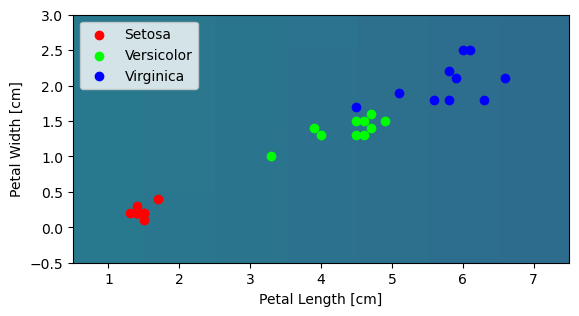

In [41]:
plt.imshow(p)
for i in [0,1,2]:
    plt.scatter('Petal Len.','Petal Width',data=Train[i],color=colors[i],label=names[i])
plt.xlim([0.5,7.5])
plt.ylim([-0.5,3.0])
plt.legend()
plt.xlabel('Petal Length [cm]')
plt.ylabel('Petal Width [cm]')